# Практическая работа №1: Краевая задача для уравнения II-го порядка

Выполнил студент гр. 9382 Юрьев Сергей, вариант 37.

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

### Задача Коши
Система n ОДУ первого порядка:
$
\begin{cases}
    y'_1=f_1(x,y_1,...,y_n) \\
    \dots \\
    y'_n=f_n(x,y_1,...,y_n) \\
    y_1(x_0)=y_{01} \\
    \dots \\
    y_n(x_0)=y_{0n} \\
\end{cases}
$

ОДУ n-го порядка:
$
\begin{cases}
    y^{(n)}=f(x,y,...,y^{(n-1)}) \\
    y(x_0)=y_{01} \\
    \dots \\
    y^{(n-1)}(x_0)=y_{0n} \\
\end{cases}
$

Решение задачи Коши состоит в нахождении решения (интеграла) дифференциального уравнения, удовлетворяющим начальным условиям.

### Краевая задача 
Задача о нахождении решения заданного дифференциального уравнения удовлетворяющего краевым условиям в концах интервала.

## Постановка задачи

Дано дифференциальное уравнение:

$y''= f(x, y), a < x < b$ (1)

и граничные условия

$y(a) = y_a, y(b) = y_b.$ (2)

Требуется найти решение задачи (1)-(2) и построить его график.

Рассмотрим задачу Коши для уравнения (1) с начальными условиями

$y(a) = y_a, y'(a) = h$ (3)

План решения основан на многократном решении задачи Коши (1), (3).
Значение решения задачи Коши при x = b является функцией от h.

Задача сводится к отысканию такого значения переменной h, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться

$y(b, h) = y_b$ (4)

Это уравнение с одним неизвестным h.
Для его решения можно применить стандартный метод половинного деления.


## Выполнение работы

$f(x,y) = 3^x+2^y$

a = 0

b = 2

$y_a = 1$

$y_b = 2$

Общий вид задачи Коши:

$
\begin{cases}
    y''=f(x,y) \\
    y(a)=1 \\
    y'(a)=h \\
\end{cases}
$

Сведём дифференциальное уравнение к равносильной системе:

$
\begin{cases}
    y'= g \\
    g'= 3^x+2^y \\
\end{cases}
$

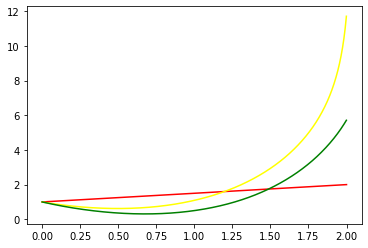

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

def f(t,Y):
    return Y[1], 3**t + 2**Y[0]

y_a = 1
y_b = 2
h_0 = -2

intervals = np.arange(0, 2, 0.001)
solution = solve_ivp(f, (0, 2), (y_a, h_0), t_eval=intervals)
plt.plot([0,2],[1,2], color = 'red')
plt.plot(intervals, solve_ivp(f, (0, 2), (y_a, h_0+0.5), t_eval=intervals).y[0], color = 'yellow')
plt.plot(intervals, solution.y[0], color = 'green')

Из графика можно видеть, что при увеличении h функция отдаляется от краевого значения y(b) = 2, следовательно, значение h необходимо уменьшать.

-2.9599999999999795
1.9852654202932671


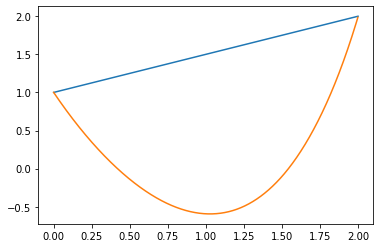

In [77]:
h_cur = h_0
h_prev = h_0

while solution.y[0][-1] >= y_b:
    h_prev = h_cur
    h_cur = h_prev - 0.01
    solution = solve_ivp(f, (0, 2), (y_a, h_cur), t_eval=intervals)

plt.plot([0,2],[1,2])
plt.plot(intervals, solution.y[0])
print(h_cur)
print(solution.y[0][-1])

После получения "вилки", которой принадлежит y(b), методом половинного деления уточним получившийся результат.

1.9861917367298834
-2.95968749999998


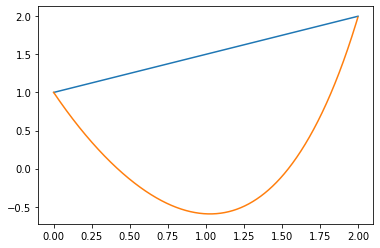

In [78]:
prev_solution = solve_ivp(f, (0, 2), (y_a, h_prev), t_eval=intervals)
cur_solution = solve_ivp(f, (0, 2), (y_a, h_cur), t_eval=intervals)

while abs(prev_solution.y[0][-1]-cur_solution.y[0][-1]) > 0.001:
    h_mid = (h_prev + h_cur)/2
    mid_solution = solve_ivp(f, (0, 2), (y_a, h_mid), t_eval=intervals)
    if (mid_solution.y[0][-1] <= y_b <= cur_solution.y[0][-1]):
        h_cur = h_mid
        cur_solution = solve_ivp(f, (0, 2), (y_a, h_cur), t_eval=intervals)
    else:
        h_prev = h_mid
        prev_solution = solve_ivp(f, (0, 2), (y_a, h_prev), t_eval=intervals)


mid_solution = solve_ivp(f, (0, 2), (y_a, h_mid), t_eval=intervals)
print(mid_solution.y[0][-1])
print(h_mid)
plt.plot([0,2],[1,2])
plt.plot(intervals, mid_solution.y[0])

Получившееся значение h = -2.95968749999998, при котором y(2) = 1.9861917367298834

## Выводы

Была решена краевая задача для уравнения второго порядка путем многократного решения задачи Коши. Сначала ОДУ второго порядка было сведено к системе из двух ОДУ первого порядка. Затем, многократно решена задача Коши, после чего было найдено два значения $y_{h_p}, y_{h_c}$, между которыми находится $y_b$. Затем, методом половинного деления, значение h было уточнено.